<a href="https://colab.research.google.com/github/rizkiar00/K-Nearest-Neighbour/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; 
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import math
import operator 
%matplotlib inline
!git clone https://github.com/rizkiar00/K-Nearest-Neighbour

Cloning into 'K-Nearest-Neighbour'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 37 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), done.


In [2]:
data = pd.read_csv('K-Nearest-Neighbour/DataTrain_Tugas3_AI.csv',skipinitialspace=True,usecols = [1,2,3,4,5,6]) #Masukkan Data dan Buat Data Training
scaler = StandardScaler() #Buat Standarisasi Data(Gak Wajib)
scaler.fit(data.drop('Y',axis=1))
scaled_features = scaler.transform(data.drop('Y',axis=1)) #Standarisasi Data
array = np.array(data['Y'])
training = np.append(scaled_features,np.array(array[:, None]),axis=1)
training

array([[-1.56718539, -0.63126978,  0.3100288 ,  0.74183408,  0.13848686,
         1.        ],
       [ 0.00494917, -0.03183679, -1.00939645, -0.44100955, -0.56845289,
         0.        ],
       [-0.67046181, -0.24204009,  1.02504804,  0.12291363, -0.47943838,
         1.        ],
       ...,
       [ 1.10316536, -1.3170963 , -0.46049094,  0.77378754,  1.27127779,
         2.        ],
       [ 0.19114389,  2.77322532, -2.36582892,  0.50094108,  1.06312669,
         3.        ],
       [ 0.73275265, -0.3298688 ,  1.44404221,  0.08440413, -0.91688812,
         3.        ]])

In [0]:
#datasisa = datatraining.drop(datasample.index) #Buat data yang ada datatraining tapi tidak ada di datasample
#datasisahasil = datasisa.pop('Y') #Pisahin inputan sama output
#datasamplehasil = datasample.pop('Y')
def euclideanDistance(instance1, instance2, length):
  distance = 0
  for x in range(length):
    distance += pow((instance1[x] - instance2[x]), 2)
  return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
  distances = []
  length = len(testInstance)-1
  for x in range(len(trainingSet)):
    dist = euclideanDistance(testInstance, trainingSet[x], length)
    distances.append((trainingSet[x], dist))
  distances.sort(key=operator.itemgetter(1))
  neighbors = []
  for x in range(k):
    neighbors.append(distances[x][0])
  return neighbors

def getResponse(neighbors):
  classVotes = {}
  for x in range(len(neighbors)):
    response = neighbors[x][-1]
    if response in classVotes:
      classVotes[response] += 1
    else:
      classVotes[response] = 1
  arr = np.array(classVotes.items())
  sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
  return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
  correct = 0
  for x in range(len(testSet)):
    testSet[x][-1]
    if testSet[x][-1] == predictions[x]:
      correct += 1
  return (correct/float(len(testSet))) * 100.0

In [5]:
#TRAIN YANG BANYAK TEST YANG DIKIT
#XTRAIN = INPUT TRAIN. YTRAIN = OUTPUT TRAIN
q = 10 #Beraoa kali coba
k = 30
avgaccuracy=np.zeros(k)
for z in range(1,q+1):
    X_train, X_test, y_train, y_test = train_test_split(training,data['Y'],test_size=0.20)
    y_train = np.array(y_train)
    trainingSet = np.append(X_train,y_train[:, None],axis=1)
    testSet = np.append(X_test,y_test[:, None],axis=1)
    allacuracy=[]
    for y in range(1,k+1):
        predictions=[]
        for x in range(len(testSet)):
            neighbors = getNeighbors(trainingSet, X_test[x], y)
            result = getResponse(neighbors)
            predictions.append(result)
        accuracy = getAccuracy(testSet, predictions)
        allacuracy.append(accuracy)
    print(z)
    avgaccuracy+=np.array(allacuracy)
avgaccuracy = avgaccuracy / q
print(avgaccuracy)

1
2
3
4
5
6
7
8
9
10
[81.9375 81.9375 83.5    84.3125 84.9375 85.6875 86.3125 86.125  85.5625
 85.6875 85.875  86.0625 85.3125 85.8125 86.0625 85.5625 85.875  85.25
 84.3125 84.8125 84.1875 84.8125 84.375  84.375  84.25   84.375  84.4375
 84.25   84.125  84.25  ]


Text(0,0.5,'Accuracy')

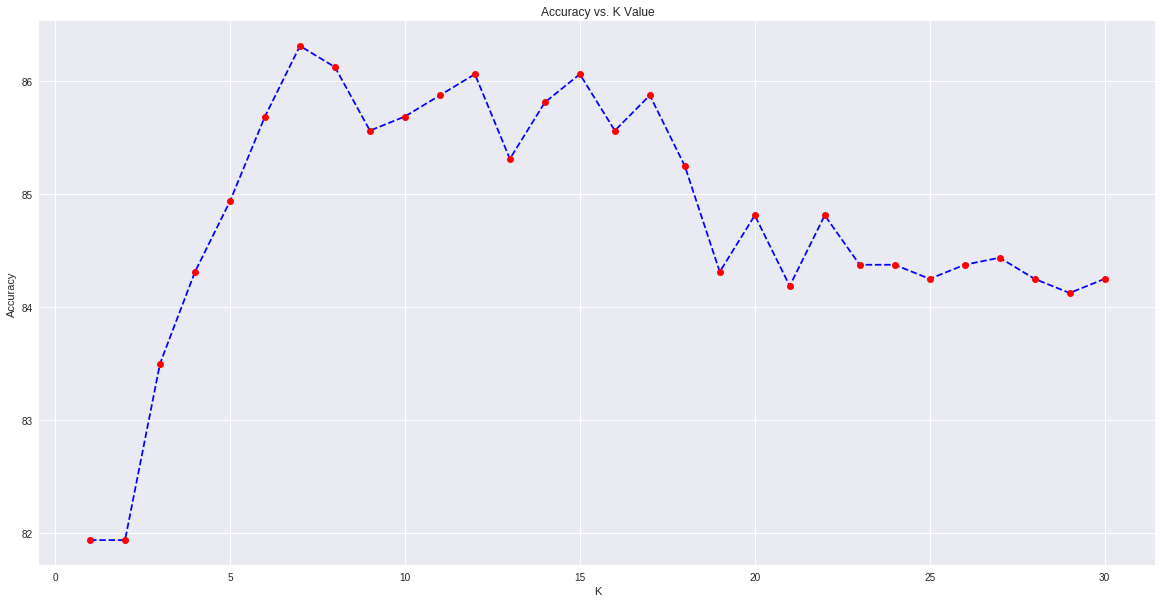

In [7]:
plt.figure(figsize=(20,10))
plt.plot(range(1,k+1),avgaccuracy,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=7)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [0]:
datatest = pd.read_csv('K-Nearest-Neighbour/DataTest_Tugas3_AI.csv',skipinitialspace=True,usecols = [1,2,3,4,5,6])
scaler = StandardScaler() #Buat Standarisasi Data(Gak Wajib)
scaler.fit(datatest.drop('Y',axis=1))
scaled_features = scaler.transform(datatest.drop('Y',axis=1)) #Standarisasi Data
test = scaled_features


In [0]:
predictions = []
for x in range(len(test)):
      neighbors = getNeighbors(training, test[x], 8)
      result = getResponse(neighbors)
      predictions.append(result)
hasil = pd.DataFrame(data=predictions)
hasil.to_csv('TebakanTugas3.csv', sep='\t', encoding='utf-8',header=None,index=False)
files.download('TebakanTugas3.csv')